In [3]:
import pandas as pd




In [6]:
# #################### All points stats ####################

# all_points = pd.read_csv('../data/all_review_points.csv')
# ### group by venues and output statistics about the number of points, and number of reviews and average length of reviews and average length of
# # group by venue
# grouped = all_points.groupby('venue')
# # number of points
# num_points = grouped.size()
# # number of reviews
# num_reviews = grouped['focused_review'].nunique()
# # average length of reviews
# avg_length = grouped['focused_review'].apply(lambda x: x.str.len().mean())
# # average length of points
# avg_length_points = grouped['point'].apply(lambda x: x.str.len().mean())

# # have a total row at the end
# num_points['total'] = num_points.sum()
# num_reviews['total'] = num_reviews.sum()
# avg_length['total'] = avg_length.mean()
# avg_length_points['total'] = avg_length_points.mean()

# # output
# stats = pd.concat([num_points, num_reviews, avg_length, avg_length_points], axis=1)
# stats.columns = ['num_points', 'num_reviews', 'avg_length_review', 'avg_length_point']

# print(stats)


            num_points  num_reviews  avg_length_review  avg_length_point
venue                                                                   
ACL_2017           542          140        2878.538745        231.219557
ARR_2022          1701          404        1948.604350        231.130511
EMNLP_2023        8616         3156         989.245822        246.467154
ICLR_2021          591          220        3254.292724        258.284264
ICLR_2022         1447          544        2403.621285        244.508639
ICLR_2023         2077          880        1627.336543        236.562831
ICLR_2024        63280        18343        1646.972772        263.530088
ICLR_2025       119311        33032        1774.188935        275.370351
NIPS_2016          137           41        1889.686131        234.737226
NIPS_2017          254           69        1904.429134        234.393701
NIPS_2018          895          227        2684.281564        242.513966
NIPS_2019          516          146        2958.160

In [13]:
# ######################### Human Data #########################
# import datasets
# aspects = [ 'actionability', 'grounding_specificity','verifiability', 'helpfulness', 'addressed_to_author','valid_point','professional_tone']
# human_data = {}

# for aspect in aspects:
#     human_data[aspect] = []
#     for type in ['gold', 'silver', 'hard']:
#         try:
#             df = datasets.load_dataset('boda/review_evaluation_human_annotation', split=type, name=aspect).to_pandas()
#             human_data[aspect].append(df)
#         except:
#             continue
#     ## concat all dataframes into one
#     human_data[aspect] = pd.concat(human_data[aspect])


gold-00000-of-00001.parquet:   0%|          | 0.00/971k [00:00<?, ?B/s]

silver-00000-of-00001.parquet:   0%|          | 0.00/214k [00:00<?, ?B/s]

Generating gold split:   0%|          | 0/838 [00:00<?, ? examples/s]

Generating silver split:   0%|          | 0/169 [00:00<?, ? examples/s]

gold-00000-of-00001.parquet:   0%|          | 0.00/1.19M [00:00<?, ?B/s]

silver-00000-of-00001.parquet:   0%|          | 0.00/38.0k [00:00<?, ?B/s]

Generating gold split:   0%|          | 0/1027 [00:00<?, ? examples/s]

Generating silver split:   0%|          | 0/22 [00:00<?, ? examples/s]

In [14]:
# grouped = human_data['grounding_specificity'].groupby('venue')
# # number of points
# num_points = grouped.size()
# # number of reviews
# num_reviews = grouped['focused_review'].nunique()
# # average length of reviews
# avg_length = grouped['focused_review'].apply(lambda x: x.str.len().mean())
# # average length of points
# avg_length_points = grouped['review_point'].apply(lambda x: x.str.len().mean())

# # have a total row at the end
# num_points['total'] = num_points.sum()
# num_reviews['total'] = num_reviews.sum()
# avg_length['total'] = avg_length.mean()
# avg_length_points['total'] = avg_length_points.mean()

# # output
# stats = pd.concat([num_points, num_reviews, avg_length, avg_length_points], axis=1)
# stats.columns = ['num_points', 'num_reviews', 'avg_length_review', 'avg_length_point']

# print(stats)


            num_points  num_reviews  avg_length_review  avg_length_point
venue                                                                   
ACL_2017            35           31        2974.600000        246.200000
ARR_2022            55           51        2151.454545        262.672727
EMNLP_2023          90           89        1106.522222        249.844444
ICLR_2021           63           53        2803.857143        285.238095
ICLR_2022           73           66        2388.506849        260.191781
ICLR_2023           78           75        1698.705128        256.679487
ICLR_2024           85           85        1681.000000        317.294118
ICLR_2025           86           86        1874.744186        285.279070
NIPS_2016           72           34        1812.986111        255.958333
NIPS_2017           69           40        1950.608696        279.057971
NIPS_2018           73           63        2416.506849        260.506849
NIPS_2019           62           50        2522.193

In [ ]:
import pandas as pd 
import datasets

human_data  = datasets.load_dataset('boda/review_evaluation_human_annotation', name= '', split = 'full')
aspects = [ 'actionability', 'grounding_specificity','verifiability', 'helpfulness']


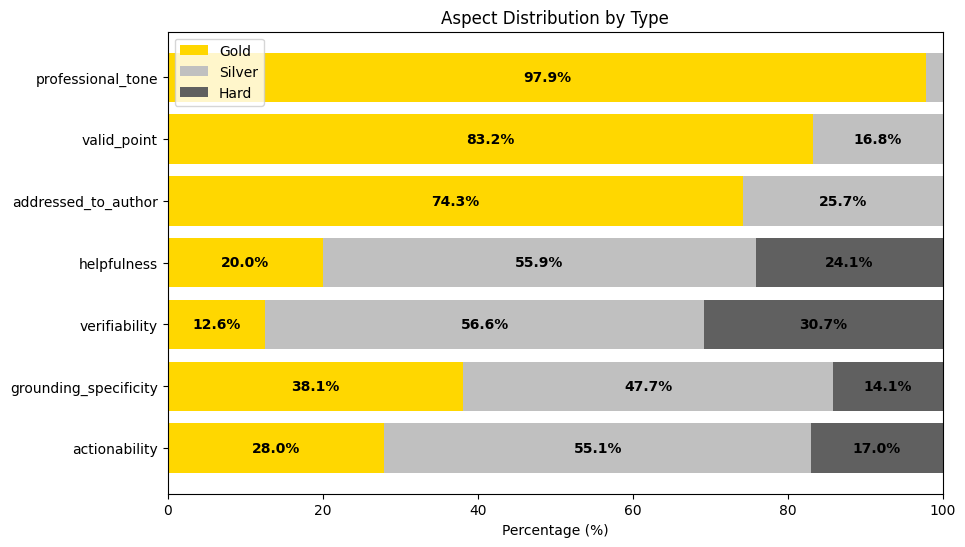

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Data: Aspects and their percentages for each type
gold = []    # Percentages of Gold
silver = []  # Percentages of Silver
hard = []    # Percentages of Hard

for aspect in aspects:
    gold.append(len(human_data[aspect][human_data[aspect][f'{aspect}_label_type'] == 'gold']) / human_data[aspect].shape[0] * 100)
    silver.append(len(human_data[aspect][human_data[aspect][f'{aspect}_label_type'] == 'silver']) / human_data[aspect].shape[0] * 100)
    hard.append(len(human_data[aspect][human_data[aspect][f'{aspect}_label_type'] == 'hard']) / human_data[aspect].shape[0] * 100)

# Set the y positions
y_pos = np.arange(len(aspects))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot stacked bars with more saturated colors
bar1 = ax.barh(y_pos, gold, color='#FFD700', label='Gold')  # Rich gold
bar2 = ax.barh(y_pos, silver, left=gold, color='#C0C0C0', label='Silver')  # Darker silver
bar3 = ax.barh(y_pos, hard, left=np.array(gold) + np.array(silver), color='#606060', label='Hard')  # Deep gray

# Function to add percentage labels
def add_labels(bars, left_values):
    for bar, left in zip(bars, left_values):
        width = bar.get_width()
        if width > 5:  # Only label if the segment is large enough
            ax.text(left + width / 2, bar.get_y() + bar.get_height() / 2,
                    f'{width:.1f}%', ha='center', va='center', fontsize=10, color='black', fontweight='bold')

# Add labels for each section
add_labels(bar1, np.zeros(len(gold)))  # Gold starts from 0
add_labels(bar2, gold)  # Silver starts from gold
add_labels(bar3, np.array(gold) + np.array(silver))  # Hard starts from gold + silver

# Labels and title
ax.set_yticks(y_pos)
ax.set_yticklabels(aspects)
ax.set_xlabel("Percentage (%)")
ax.set_title("Aspect Distribution by Type")

# Add legend
ax.legend()

# Save the figure as a PDF
plt.savefig("/home/abdelrahman.sadallah/mbzuai/review_rewrite/data/stats/human_data_aspect_distribution.pdf", format="pdf", bbox_inches="tight")

# Show the plot
plt.show()


/tmp/ipykernel_345917/2853676952.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('RdYlGn', len(labels))  # Using the RdYlGn colormap (Red-Yellow-Green)


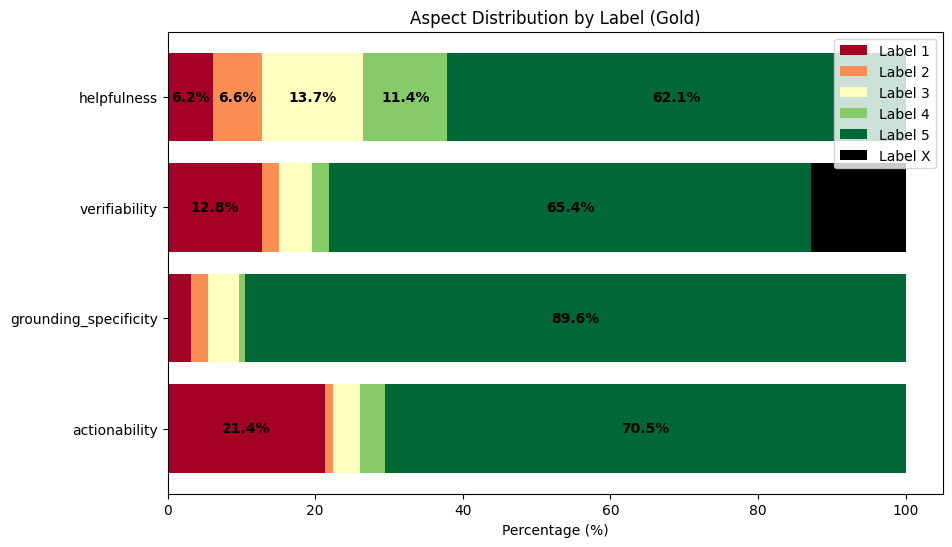

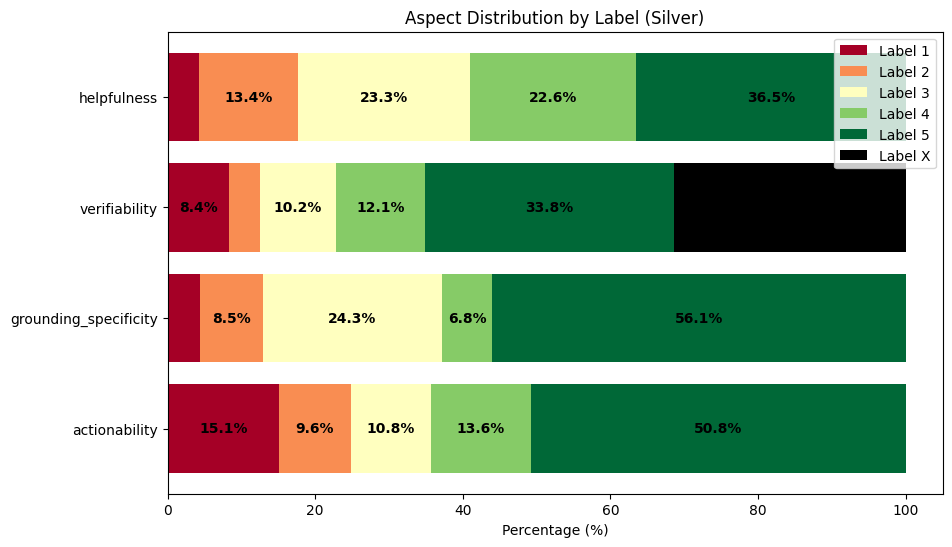

In [31]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib import cm

# # Define labels (1 to 5) and 'X' for verifiability
# labels = [1, 2, 3, 4, 5]
# verifiability_labels = [1, 2, 3, 4, 5, 'X']

# # Create a red-to-green colormap (avoiding yellow)
# cmap = cm.get_cmap('RdYlGn', len(labels))  # Using the RdYlGn colormap (Red-Yellow-Green)

# # Generate colors from the colormap
# colors = [cmap(i) for i in range(len(labels))]  # Red to green gradient for labels 1-5

# # Add a color for 'X' (this can be black, or any color you prefer)
# colors.append('#000000')  # For 'X'

# aspects = ['actionability', 'grounding_specificity', 'verifiability', 'helpfulness']

# def plot_aspect_distribution(label_type):
#     # Store percentages for each aspect-label pair
#     label_percentages = {aspect: {} for aspect in aspects}

#     # Compute percentages for each aspect and label
#     for aspect in aspects:
#         filtered_data = human_data[aspect][human_data[aspect][f'{aspect}_label_type'] == label_type]
#         total = filtered_data.shape[0]  # Total samples in the aspect
        
#         cur_labels = verifiability_labels if aspect == 'verifiability' else labels
#         for label in cur_labels:
#             count = len(filtered_data[filtered_data[f'{aspect}_label'] == str(label)])
#             percentage = (count / total) * 100 if total > 0 else 0
#             label_percentages[aspect][label] = percentage  

#     # Set y positions for the aspects
#     y_pos = np.arange(len(aspects))

#     # Create the plot
#     fig, ax = plt.subplots(figsize=(10, 6))

#     # Initialize left stacking positions
#     left_values = np.zeros(len(aspects))

#     # Stack bars for each label
#     for i, label in enumerate(labels):  # First, plot labels 1-5
#         label_values = [label_percentages[aspect].get(label, 0) for aspect in aspects]  
#         bar = ax.barh(y_pos, label_values, color=colors[i], label=f'Label {label}', left=left_values)
#         left_values += np.array(label_values)  

#         # Add percentage text labels
#         for rect, percent in zip(bar, label_values):
#             if percent > 5:  
#                 ax.text(rect.get_x() + rect.get_width() / 2, rect.get_y() + rect.get_height() / 2,
#                         f'{percent:.1f}%', ha='center', va='center', fontsize=10, color='black', fontweight='bold')

#     # Special handling for 'X' (only in verifiability)
#     if 'verifiability' in aspects:
#         idx = aspects.index('verifiability')  # Get position of verifiability aspect
#         x_percentage = label_percentages['verifiability'].get('X', 0)  # Get 'X' percentage
#         bar_x = ax.barh(y_pos[idx], x_percentage, color=colors[-1], label='Label X', left=left_values[idx])  
#         left_values[idx] += x_percentage  

#         # Add percentage label for 'X'
#         if x_percentage > 5:  
#             ax.text(left_values[idx] - x_percentage / 2, y_pos[idx],
#                     f'{x_percentage:.1f}%', ha='center', va='center', fontsize=10, color='black', fontweight='bold')

#     # Labels and title
#     ax.set_yticks(y_pos)
#     ax.set_yticklabels(aspects)
#     ax.set_xlabel("Percentage (%)")
#     ax.set_title(f"Aspect Distribution by Label ({label_type.capitalize()})")

#     # Add legend
#     ax.legend()

#     # Save the figure as a PDF
#     plt.savefig(f"aspect_label_distribution_{label_type}.pdf", format="pdf", bbox_inches="tight")

#     # Show the plot
#     plt.show()

# # Plot for gold labels
# plot_aspect_distribution('gold')

# # Plot for silver labels
# plot_aspect_distribution('silver')


In [34]:
##########################333333 Synthetic data ############################
######################### Human Data #########################
import datasets
aspects = [ 'actionability', 'grounding_specificity','verifiability', 'helpfulness']
synthetic_data = {}

for aspect in aspects:
    synthetic_data[aspect] = []
    for type in ['train', 'test']:
        try:
            df = datasets.load_dataset('boda/review_evaluation_automatic_labels', split=type, name=aspect).to_pandas()
            synthetic_data[aspect].append(df)
        except:
            continue
    ## concat all dataframes into one
    synthetic_data[aspect] = pd.concat(synthetic_data[aspect])

In [36]:
grouped = synthetic_data['actionability'].groupby('venue')
# number of points
num_points = grouped.size()
# number of reviews
num_reviews = grouped['focused_review'].nunique()
# average length of reviews
avg_length = grouped['focused_review'].apply(lambda x: x.str.len().mean())
# average length of points
avg_length_points = grouped['review_point'].apply(lambda x: x.str.len().mean())

# have a total row at the end
num_points['total'] = num_points.sum()
num_reviews['total'] = num_reviews.sum()
avg_length['total'] = avg_length.mean()
avg_length_points['total'] = avg_length_points.mean()

# output
stats = pd.concat([num_points, num_reviews, avg_length, avg_length_points], axis=1)
stats.columns = ['num_points', 'num_reviews', 'avg_length_review', 'avg_length_point']

print(stats)


            num_points  num_reviews  avg_length_review  avg_length_point
venue                                                                   
ACL_2017           296          104        2909.079585        237.658784
ARR_2022           714          317        1892.228291        247.876751
EMNLP_2023         897          785         979.916388        247.877369
ICLR_2021          285          139        3162.539007        281.231579
ICLR_2022          659          334        2185.227829        262.528073
ICLR_2023          688          450        1357.712209        251.866279
ICLR_2024         1652         1580        1608.821429        270.586562
ICLR_2025         2519         2415        1681.614133        284.186185
NIPS_2017           66           42        1815.242424        240.409091
NIPS_2018          561          198        2669.371841        248.080214
NIPS_2019          257          116        2791.540856        265.556420
NIPS_2020          825          693        1382.496

/tmp/ipykernel_345917/2593594112.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('RdYlGn', len(labels))  # Using the RdYlGn colormap (Red-Yellow-Green)


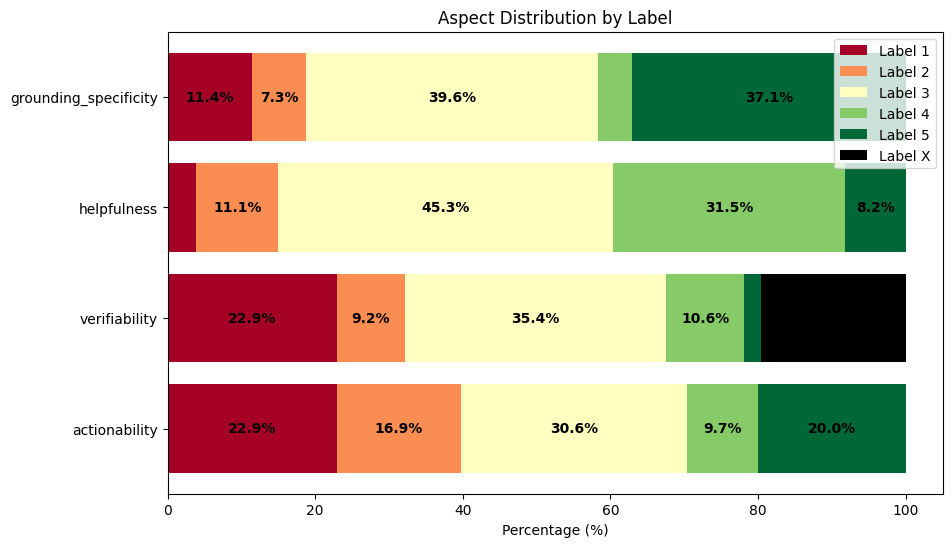

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Define labels (1 to 5) and 'X' for verifiability
labels = [1, 2, 3, 4, 5]
verifiability_labels = [1, 2, 3, 4, 5, 'X']

# Create a red-to-green colormap (avoiding yellow)
cmap = cm.get_cmap('RdYlGn', len(labels))  # Using the RdYlGn colormap (Red-Yellow-Green)

# Generate colors from the colormap
colors = [cmap(i) for i in range(len(labels))]  # Red to green gradient for labels 1-5

# Add a color for 'X' (this can be black, or any color you prefer)
colors.append('#000000')  # For 'X'

aspects = ['actionability', 'verifiability', 'helpfulness', 'grounding_specificity']


# Store percentages for each aspect-label pair
label_percentages = {aspect: {} for aspect in aspects}

# Compute percentages for each aspect and label
for aspect in aspects:
    filtered_data = synthetic_data[aspect]
    total = filtered_data.shape[0]  # Total samples in the aspect
    filtered_data[f'chatgpt_{aspect}_score']= filtered_data[f'chatgpt_{aspect}_score'].astype(str)
    cur_labels = verifiability_labels if aspect == 'verifiability' else labels
    for label in cur_labels:
        count = len(filtered_data[filtered_data[f'chatgpt_{aspect}_score'] == str(label)])
        percentage = (count / total) * 100 if total > 0 else 0
        label_percentages[aspect][label] = percentage  

# Set y positions for the aspects
y_pos = np.arange(len(aspects))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Initialize left stacking positions
left_values = np.zeros(len(aspects))

# Stack bars for each label
for i, label in enumerate(labels):  # First, plot labels 1-5
    label_values = [label_percentages[aspect].get(label, 0) for aspect in aspects]  
    bar = ax.barh(y_pos, label_values, color=colors[i], label=f'Label {label}', left=left_values)
    left_values += np.array(label_values)  

    # Add percentage text labels
    for rect, percent in zip(bar, label_values):
        if percent > 5:  
            ax.text(rect.get_x() + rect.get_width() / 2, rect.get_y() + rect.get_height() / 2,
                    f'{percent:.1f}%', ha='center', va='center', fontsize=10, color='black', fontweight='bold')

# Special handling for 'X' (only in verifiability)
if 'verifiability' in aspects:
    idx = aspects.index('verifiability')  # Get position of verifiability aspect
    x_percentage = label_percentages['verifiability'].get('X', 0)  # Get 'X' percentage
    bar_x = ax.barh(y_pos[idx], x_percentage, color=colors[-1], label='Label X', left=left_values[idx])  
    left_values[idx] += x_percentage  

    # Add percentage label for 'X'
    if x_percentage > 5:  
        ax.text(left_values[idx] - x_percentage / 2, y_pos[idx],
                f'{x_percentage:.1f}%', ha='center', va='center', fontsize=10, color='black', fontweight='bold')

# Labels and title
ax.set_yticks(y_pos)
ax.set_yticklabels(aspects)
ax.set_xlabel("Percentage (%)")
ax.set_title(f"Aspect Distribution by Label")

# Add legend
ax.legend()

# Save the figure as a PDF
plt.savefig(f"synthetic_data_aspect_label_distribution.pdf", format="pdf", bbox_inches="tight")

# Show the plot
plt.show()

